<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/NoteBook/Advance_Regression/02-01-05-glm-ordinal-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# Ordinal or Ordered logistic regression (OLR)

Ordered logistic regression is used when the dependent variable is an ordinal outcome—a categorical variable with a precise rank order but not necessarily equidistant. This method estimates each response level's probability while considering the outcome's ordered nature. Typical applications include customer satisfaction assessment, academic grading, and income classification. In this tutorial, we will discuss ordered logistic regression, manually fit a model to understand its mechanics, and use the `polr()` function from the {MASS} package in R to implement the model. We will also examine coefficients, odds ratios, and category thresholds. This tutorial will provide a practical approach to mastering ordinal logistic regression through concepts and hands-on coding.


## Overview

**Ordinal logistic regression (OLR)** is a statistical method used to analyze the relationship between one or more independent variables (predictors) and an ordinal dependent variable. An ordinal variable is a type of categorical variable where the categories have a specific order, but the intervals between the categories are not uniformly measured. This technique is commonly used in social sciences, psychology, and other fields where data is measured on Likert scales (e.g., strongly disagree, disagree, neutral, agree, strongly agree) or in scenarios where outcomes are ordered such as grades (e.g., A, B, C, D, F). OLR allows researchers to understand the impact of independent variables on the likelihood of an outcome falling into a particular category or higher.

In ordinal logistic regression (OLR), the dependent variable is assumed to have three or more ordered categories. The objective is to predict the probability of an observation falling into one of the categories based on the independent variables' values. OLR is an extension of logistic regression, which is used for binary outcomes, and it is designed to handle multiple ordered outcome categories.

The key difference between ordinal variables and nominal variables (which have no inherent order, like colors or types of fruit) is that ordinal variables convey a rank or order.

**Proportional Odds Assumption**: The primary assumption in ordinal logistic regression is that the relationship between each pair of outcome groups is the same across all levels of the independent variables. In other words, the odds ratios comparing any two outcome categories are constant across all levels of the predictor variables.

The ordered logistic regression model can be represented mathematically. Let’s denote:

-   $Y$: the ordinal dependent variable with categories \$ 1, 2, ..., J\$.
-   $X$: the vector of independent variables, $X_1, X_2, \ldots, X_p$
-   $\beta$: the vector of coefficients.

The cumulative odds of being in a category ( j ) or lower can be expressed as:

$$ \text{logit}(P(Y \leq j | X)) = \log\left(\frac{P(Y \leq j | X)}{P(Y > j | X)}\right) = \alpha_j + \beta X  $$

Where:

-   $P(Y \leq j | X)$ is the probability of being in category $j$ or lower given the predictors.
-   $\alpha_j$ represents the threshold for category $j$.

The model is fitted to estimate the parameters $\alpha_j$) and $\beta$.

-   \*\*Coefficients ($\beta$): Each coefficient represents the change in the log odds of being in a higher category of the dependent variable for a one-unit increase in the independent variable. A positive coefficient means that as the independent variable increases, the likelihood of being in a higher category also increases.

-   **Thresholds (**$\alpha_j$): These parameters indicate the cut-off points between the ordered categories. They help in understanding the probability of falling into each category.

For example, if $\beta_1$ for an independent variable $X_1$ is 0.5, it suggests that for each one-unit increase in $X1$, the log odds of being in a higher satisfaction category increases by 0.5.

***Advantages and Disadvantages***

**Advantages**: - Handles ordinal data effectively, preserving the information about order. - More informative than standard logistic regression when dealing with ordered categories. - Can accommodate multiple predictor variables, both categorical and continuous.

**Disadvantages**: - The assumption of proportional odds may not hold true in all cases, leading to biased estimates. - If the data violates this assumption, alternative models (like generalized ordered logistic regression or partial proportional odds models) may need to be considered. - Interpretation can be less straightforward compared to linear regression, especially when dealing with multiple thresholds.


## Install rpy2

In [3]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314952 sha256=b32f697965cc87fc2d5881f72bb3b21307cb461c8e5dd854cd56849042538838
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Building a Ordinal Model from Scratch

Fitting an ordinal logistic regression model from scratch in R without using any external packages involves several steps, including creating synthetic data, calculating the cumulative probabilities, estimating the model coefficients using Maximum Likelihood Estimation (MLE), and deriving the summary statistics and odds ratios with confidence intervals. Below, I will outline how to accomplish this step-by-step.


### Generate Synthetic Data

We'll create a synthetic dataset with 6 continuous predictors, one categorical predictor, and an ordinal response variable with three levels.


In [5]:
%%R
# Load required package for numerical derivatives
if (!require(numDeriv)) install.packages("numDeriv")

# Step 1: Generate Synthetic Data
set.seed(123)  # For reproducibility
n <- 200  # Number of observations

# Continuous predictors
X1 <- rnorm(n)
X2 <- rnorm(n)
X3 <- rnorm(n)
X4 <- rnorm(n)


# Categorical predictor (two levels)
land_type <- sample(c("high land", "medium high land"), n, replace = TRUE)

# Convert land_type to a numeric binary variable
land_type_numeric <- ifelse(land_type == "high land", 1, 0)

# Create a linear predictor and generate response variable
linear_predictor <- 1 + 0.5 * X1 - 0.3 * X2 + 0.2 * X3 +
                    0.7 * land_type_numeric +
                    rnorm(n)

# Define thresholds for response categories
thresholds <- c(-Inf, 0, 1, Inf)  # Create three categories (Low, Moderate, High)
response <- cut(linear_predictor, breaks = thresholds, labels = c("Low", "Moderate", "High"))

# Combine data into a data frame
data <- data.frame(X1, X2, X3, X4,  land_type_numeric, response)
head(data)

           X1         X2          X3          X4 land_type_numeric response
1 -0.56047565  2.1988103 -0.07355602  1.07401226                 0      Low
2 -0.23017749  1.3124130 -1.16865142 -0.02734697                 1 Moderate
3  1.55870831 -0.2651451 -0.63474826 -0.03333034                 0     High
4  0.07050839  0.5431941 -0.02884155 -1.51606762                 0     High
5  0.12928774 -0.4143399  0.67069597  0.79038534                 1     High
6  1.71506499 -0.4762469 -1.65054654 -0.21073418                 0     High


### Define Model Functions

In [6]:
%%R
# Step 2: Define Model Functions

# Function to compute cumulative probabilities
cumulative_probs <- function(X, beta, alpha) {
  eta <- cbind(1, X) %*% beta  # Linear predictor with intercept
  prob_low <- 1 / (1 + exp(-(eta - alpha[1])))
  prob_moderate <- prob_low / (1 + exp(-(eta - alpha[2])))
  prob_high <- 1 - prob_moderate
  return(cbind(prob_low, prob_moderate, prob_high))
}

# Function to compute the log-likelihood
log_likelihood <- function(params, data) {
  beta <- params[1:6]  # 8 coefficients for predictors + intercept
  alpha <- params[7:8]  # Two thresholds

  # Define predictor matrix X (5 predictors plus intercept)
  X <- as.matrix(data[, c("X1", "X2", "X3", "X4", "land_type_numeric")])

  response <- factor(data$response, levels = c("Low", "Moderate", "High"))

  # Calculate cumulative probabilities
  probs <- cumulative_probs(X, beta, alpha)

  # Compute log likelihood
  ll <- sum(log(ifelse(response == "Low", probs[, 1],
                ifelse(response == "Moderate", probs[, 2],
                       probs[, 3]))))
  return(-ll)  # Return negative log-likelihood for minimization
}

### Fit the model

In [7]:
%%R
# Step 3: Fit the Model

# Function to fit the model using optim
fit_model <- function(data) {
  init_params <- rep(0, 8)  # 8 for beta (including intercept) and 2 thresholds
  result <- optim(init_params, log_likelihood, data = data, method = "BFGS", hessian = TRUE)
  return(result)
}

# Fit the model
model_fit <- fit_model(data)
model_fit$par  # Model coefficients (beta) and thresholds (alpha)

[1]  4.314075699 -0.982913650  0.524043957  0.042348956 -0.009382339
[6] -1.523786205 -8.913837528  4.599729893


### Extract Coefficients and Compute Standard Errors

In [8]:
%%R
# Step 4: Extract Coefficients and Compute Standard Errors

# Compute the Hessian matrix and standard errors
hessian_matrix <- model_fit$hessian
standard_errors <- sqrt(diag(solve(hessian_matrix)))
standard_errors

[1]       NaN 0.2382101 0.2000665 0.2103150 0.1922551 0.4043306       NaN
[8]       NaN


### Create a Summary Table

In [9]:
%%R
# Step 5: Create a Summary Table

# Coefficients and standard errors
coefficients <- model_fit$par
t_values <- coefficients / standard_errors
p_values <- 2 * (1 - pnorm(abs(t_values)))  # Two-tailed p-values

# Summary table
summary_table <- data.frame(
  Value = coefficients,
  Std_Error = standard_errors,
  t_value = t_values,
  p_value = p_values
)

rownames(summary_table) <- c(paste("X", 1:4, sep = ""), "land_high", "Intercept", "alpha_1", "alpha_2")
summary_table

                 Value Std_Error    t_value      p_value
X1         4.314075699       NaN        NaN          NaN
X2        -0.982913650 0.2382101 -4.1262462 3.687325e-05
X3         0.524043957 0.2000665  2.6193491 8.809775e-03
X4         0.042348956 0.2103150  0.2013596 8.404174e-01
land_high -0.009382339 0.1922551 -0.0488015 9.610775e-01
Intercept -1.523786205 0.4043306 -3.7686644 1.641233e-04
alpha_1   -8.913837528       NaN        NaN          NaN
alpha_2    4.599729893       NaN        NaN          NaN


### Calculate Odds Ratios and Confidence Intervals


In [10]:
%%R
# Step 6: Calculate Odds Ratios and Confidence Intervals

# Calculate odds ratios and CI
odds_ratios <- exp(coefficients)
ci_lower <- exp(coefficients - 1.96 * standard_errors)
ci_upper <- exp(coefficients + 1.96 * standard_errors)

# Create a table for odds ratios and CI
odds_ratios_table <- data.frame(
  Odds_Ratio = odds_ratios,
  CI_Lower = ci_lower,
  CI_Upper = ci_upper
)

rownames(odds_ratios_table) <- rownames(summary_table)
odds_ratios_table

            Odds_Ratio   CI_Lower  CI_Upper
X1        7.474451e+01        NaN       NaN
X2        3.742192e-01 0.23461591 0.5968904
X3        1.688843e+00 1.14100979 2.4997089
X4        1.043258e+00 0.69082517 1.5754901
land_high 9.906615e-01 0.67963296 1.4440298
Intercept 2.178854e-01 0.09864043 0.4812837
alpha_1   1.345146e-04        NaN       NaN
alpha_2   9.945745e+01        NaN       NaN


### Cross validation

To evaluate the model's performance using cross-validation, we’ll use k-fold cross-validation, where we split the data into k folds, train on k-1 folds, and test on the remaining fold. We repeat this process k times, each time using a different fold as the test set, and then compute the average accuracy across all folds.

In [11]:
%%R
# Load required package for sampling
if (!require(numDeriv)) install.packages("numDeriv")

# Function to calculate accuracy
calculate_accuracy <- function(true_labels, predicted_labels) {
  mean(true_labels == predicted_labels)
}

# Define the model fitting function
fit_model <- function(data) {
  init_params <- rep(0, 8)  # 8 for beta (including intercept) and 2 thresholds
  result <- optim(init_params, log_likelihood, data = data, method = "BFGS", hessian = TRUE)
  return(result)
}

# Define the prediction function
predict_ordinal <- function(test_data, params) {
  beta <- params[1:6]  # Coefficients for predictors + intercept
  alpha <- params[7:8]  # Thresholds

  # Define predictor matrix X for test data
  X <- as.matrix(test_data[, c("X1", "X2", "X3", "X4",  "land_type_numeric")])

  # Compute cumulative probabilities
  eta <- cbind(1, X) %*% beta  # Linear predictor with intercept
  prob_low <- 1 / (1 + exp(-(eta - alpha[1])))
  prob_moderate <- prob_low / (1 + exp(-(eta - alpha[2])))
  prob_high <- 1 - prob_moderate

  # Combine probabilities into a matrix
  probs <- cbind(prob_low, prob_moderate, prob_high)

  # Assign predicted category based on max probability
  predictions <- apply(probs, 1, function(row) {
    if (row[1] >= row[2] && row[1] >= row[3]) {
      "Low"
    } else if (row[2] >= row[1] && row[2] >= row[3]) {
      "Moderate"
    } else {
      "High"
    }
  })
  return(predictions)
}

# Function for k-fold cross-validation
k_fold_cv <- function(data, k = 5) {
  n <- nrow(data)
  fold_size <- floor(n / k)
  indices <- sample(1:n)

  accuracies <- c()  # Store accuracy for each fold

  for (i in 1:k) {
    # Create training and validation sets
    val_indices <- indices[((i - 1) * fold_size + 1):(i * fold_size)]
    train_indices <- setdiff(indices, val_indices)

    train_data <- data[train_indices, ]
    val_data <- data[val_indices, ]

    # Fit the model on the training set
    fold_fit <- fit_model(train_data)

    # Predict on validation set
    val_predictions <- predict_ordinal(val_data, fold_fit$par)

    # Calculate accuracy for the current fold
    fold_accuracy <- calculate_accuracy(val_data$response, val_predictions)
    accuracies <- c(accuracies, fold_accuracy)
  }

  # Return the average cross-validation accuracy
  cv_accuracy <- mean(accuracies)
  return(cv_accuracy)
}

# Perform 5-fold cross-validation on the entire dataset
set.seed(123)
cv_accuracy <- k_fold_cv(data, k = 5)
print(paste("5-Fold Cross-Validation Accuracy:", round(cv_accuracy * 100, 2), "%"))


[1] "5-Fold Cross-Validation Accuracy: 11.5 %"


## Fit Ordinal Logistic Regression in R

### Check and Install Required R Packages

In [ ]:
%%R
pkg <- c('tidyverse',
     'plyr',
		 'gt',
		 'rstatix',
		 'gtsummary',
		 'report',
		 'performance',
		 'jtools',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics',
		 'ggpmisc',
		 'caret',
		 'tidymodels',
		 'metrica',
		 'RColorBrewer',
		 'MASS',
     'generalhoslem'
		 )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Load packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(plyr))
library(tidyverse)
library(plyr)
library(gt)
library(rstatix)
library(gtsummary)
library(report)
library(performance)
library(jtools)
library(margins)
library(marginaleffects)
library(ggeffects)
library(patchwork)
library(Metrics)
library(ggpmisc)
library(RColorBrewer)
library(MASS)
library(generalhoslem)

### Data

Our goal is to develop a Ordinal regression model to predict ordinal class of paddy soil arsenic (non-contaminated, moderately-contaminated and highly-contaminated ) using selected irrigation water and soil properties. We have available data of 263 paired groundwater and paddy soil samples from arsenic contaminated areas in Tala Upazilla, Satkhira district, Bangladesh. This data was utilized in a publication titled "Factors Affecting Paddy Soil Arsenic Concentration in Bangladesh: Prediction and Uncertainty of Geostatistical Risk Mapping" which can be accessed via the this [URL](https://doi.org/10.1016/j.scitotenv.2011.10.008)

Full data set is available for download can download from my [Dropbox](https://www.dropbox.com/scl/fo/2rh6r68i9cxmgortvbw8q/h?rlkey=bvntt66n9mcywprmdki08ch3r&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.

We will use `read_csv()` function of **readr** package to import data as a **tidy** data.

In [13]:
%%R
mf<-read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv") |>
glimpse()

Rows: 263 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Land_type
dbl (28): ID, Longitude, Latitude, WAs, WP, WFe, WEc, WpH, WMg, WNa, WCa, WK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 263
Columns: 29
$ ID              <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Longitude       <dbl> 89.1134, 89.1232, 89.1281, 89.1296, 89.1312, 89.1305, …
$ Latitude        <dbl> 22.7544, 22.7576, 22.7499, 22.7568, 22.7366, 22.7297, …
$ WAs             <dbl> 0.059, 0.059, 0.079, 0.122, 0.072, 0.042, 0.075, 0.064…
$ WP              <dbl> 0.761, 1.194, 1.317, 1.545, 0.966, 1.058, 0.868, 0.890…
$ WFe             <dbl> 3.44, 4.93, 9.70, 8.58, 4.78, 6.95, 7.81, 8.14, 8.99, …
$ WEc             <dbl> 1.03, 1.07, 1.40, 0.83, 1.42, 1.82, 1.71, 1.74, 1.57, …
$ WpH             <dbl> 7.03, 7.06, 6.84, 6.8

#### Convert continuous variables into ordinal variables
An ordinal variable is a type of categorical variable in which the categories have a natural order or hierarchy. Unlike interval or ratio variables, the intervals between the categories are not necessarily equal or measurable. This means that while the categories have a meaningful sequence or ranking, the differences between the categories may not be consistent or quantifiable.

We will convert `Soil As (SAs)` into three classes:

A. Non-contaminated, SAs \< 14.8 mg/kg

B. Moderately-contaminated, SAs 14.8 - 20 mg/kg

C. Highly-contaminated: SAs \> 20 mg/kg

-   14.8 mg/kg is the upper baseline soil arsenic concentration for Bangladesh [(Ahmed et al, 2011)](https://www.sciencedirect.com/science/article/pii/S0048969711011661?via%3Dihub)

-   20 mg/kg is the permissible limits of arsenic in agricultural soil [(A Heikens, 2006)](https://agris.fao.org/search/en/providers/122621/records/6472474853aa8c8963049da2)



In [14]:
%%R
mf$Class_As<- cut(mf$SAs,
                   breaks=c(-Inf, 14.8, 20,  Inf),
                   labels=c("Non-contaminated",
                            "Moderately-contaminated",
                            "Highly-contaminated"))

#### Data Processing

In [15]:
%%R
df <- mf |>
  # select variables
  dplyr::select (WAs,  WFe,
                SOC, SAoFe,
                Year_Irrigation, Distance_STW,
                Land_type, Class_As) |>
   # convert to factor
   dplyr::mutate_at(vars(Land_type), funs(factor))  |>
   dplyr::mutate_at(vars(Class_As), funs(factor))  |>
   # normalize the all numerical features
   #dplyr::mutate_at(1:14,  funs((.-min(.))/max(.-min(.)))) |>
   glimpse()

Rows: 263
Columns: 8
$ WAs             <dbl> 0.059, 0.059, 0.079, 0.122, 0.072, 0.042, 0.075, 0.064…
$ WFe             <dbl> 3.44, 4.93, 9.70, 8.58, 4.78, 6.95, 7.81, 8.14, 8.99, …
$ SOC             <dbl> 1.66, 1.26, 1.36, 1.61, 1.26, 1.74, 1.71, 1.69, 1.41, …
$ SAoFe           <dbl> 2500, 2670, 2160, 2500, 2060, 2500, 2520, 2140, 2150, …
$ Year_Irrigation <dbl> 14, 20, 10, 8, 10, 9, 8, 10, 8, 2, 20, 4, 15, 10, 5, 4…
$ Distance_STW    <dbl> 5, 6, 5, 8, 5, 5, 10, 8, 10, 8, 5, 5, 9, 5, 10, 10, 12…
$ Land_type       <fct> MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL,…
$ Class_As        <fct> Highly-contaminated, Highly-contaminated, Highly-conta…


#### Split Data

In [17]:
%%R
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(df,.(Land_type, Class_As),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(df, .(Land_type, Class_As),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
print(prop.table(table(train$Class_As)))
print(prop.table(table(test$Class_As)))


       Non-contaminated Moderately-contaminated     Highly-contaminated 
              0.3571429               0.3186813               0.3241758 

       Non-contaminated Moderately-contaminated     Highly-contaminated 
              0.3456790               0.3333333               0.3209877 


### Fit an Ordinal Regression Model

We'll use the `polr()` function from the {MASS} package to fit the model. nclude the `Hess=TRUE` option to speed up subsequent calls to `summary()`.



###  Only Intercept model

In [18]:
%%R
inter.ordinal<-MASS::polr(Class_As~1, data= train,
             Hess = TRUE)
summary(inter.ordinal)

Call:
MASS::polr(formula = Class_As ~ 1, data = train, Hess = TRUE)

No coefficients

Intercepts:
                                            Value   Std. Error t value
Non-contaminated|Moderately-contaminated    -0.5878  0.1547    -3.7996
Moderately-contaminated|Highly-contaminated  0.7346  0.1584     4.6390

Residual Deviance: 399.4273 
AIC: 403.4273 


### Full Model

In [19]:
%%R
fit.ordinal<-MASS::polr(Class_As~., data= train,
             Hess = TRUE)
summary(fit.ordinal)

Call:
MASS::polr(formula = Class_As ~ ., data = train, Hess = TRUE)

Coefficients:
                     Value Std. Error   t value
WAs              8.2100291  0.0073951 1110.1914
WFe              0.2397744  0.0802218    2.9889
SOC              0.7810803  0.1105390    7.0661
SAoFe           -0.0001683  0.0002327   -0.7234
Year_Irrigation  0.2510165  0.0415561    6.0404
Distance_STW    -0.0839475  0.0290958   -2.8852
Land_typeMHL     1.3472085  0.3079710    4.3745

Intercepts:
                                            Value     Std. Error t value  
Non-contaminated|Moderately-contaminated       3.6078    0.0209   172.7367
Moderately-contaminated|Highly-contaminated    5.8488    0.2641    22.1454

Residual Deviance: 284.2497 
AIC: 302.2497 


### Check the Overall Model Fit

We can see that the `Preg` coefficient is 0.062. Here we can infer that for each unit increase in Preg, the predicted probability of having dibetes increases by a factor of exp(0.062) = 1.06, or about 6%. This effect is statistically significant with a p-value of 0.00805.

In [20]:
%%R
anova(inter.ordinal,fit.ordinal)

Likelihood ratio tests of ordinal regression models

Response: Class_As
                                                                 Model
1                                                                    1
2 WAs + WFe + SOC + SAoFe + Year_Irrigation + Distance_STW + Land_type
  Resid. df Resid. Dev   Test    Df LR stat. Pr(Chi)
1       180   399.4273                              
2       173   284.2497 1 vs 2     7 115.1776       0


From the above output, you see that the chi-square is 284.2497 and p = <0.0001. This means that you can reject the null hypothesis that the model without predictors is as good as the model with the predictors

### Goodness of Fit Tests

The Lipsitz goodness-of-fit test is a statistical tool used to determine how well a logistic regression model predicts binary outcomes. It checks if the observed frequencies of the outcome variable in the sample align with the expected frequencies predicted by the logistic regression model.

In [21]:
%%R
generalhoslem::lipsitz.test(fit.ordinal)


	Lipsitz goodness of fit test for ordinal response models

data:  formula:  Class_As ~ WAs + WFe + SOC + SAoFe + Year_Irrigation + Distance_STW + formula:      Land_type
LR statistic = 17.772, df = 9, p-value = 0.03792



### Calculate p-values

In a summary output or an ordinal model, `p-values` are not provided. One way to calculate a `p-values` is by comparing the `t-value` against the standard normal distribution, similar to a `z test`. However, this is only accurate with infinite degrees of freedom, but it can be reasonably approximated by large samples. The accuracy decreases as the sample size decreases.

In [23]:
%%R
ctable<-coef(summary(fit.ordinal))
ctable

                                                    Value   Std. Error
WAs                                          8.2100290729 0.0073951477
WFe                                          0.2397744379 0.0802217845
SOC                                          0.7810803115 0.1105389702
SAoFe                                       -0.0001683201 0.0002326754
Year_Irrigation                              0.2510164625 0.0415561033
Distance_STW                                -0.0839474818 0.0290957745
Land_typeMHL                                 1.3472085066 0.3079710144
Non-contaminated|Moderately-contaminated     3.6077944236 0.0208860867
Moderately-contaminated|Highly-contaminated  5.8487789533 0.2641078579
                                                 t value
WAs                                         1110.1913577
WFe                                            2.9888943
SOC                                            7.0661081
SAoFe                                         -0.7234113
Year_

In [24]:
%%R
p <- pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2
## combined table
ctable <- cbind(ctable, "p value" = p)
ctable

                                                    Value   Std. Error
WAs                                          8.2100290729 0.0073951477
WFe                                          0.2397744379 0.0802217845
SOC                                          0.7810803115 0.1105389702
SAoFe                                       -0.0001683201 0.0002326754
Year_Irrigation                              0.2510164625 0.0415561033
Distance_STW                                -0.0839474818 0.0290957745
Land_typeMHL                                 1.3472085066 0.3079710144
Non-contaminated|Moderately-contaminated     3.6077944236 0.0208860867
Moderately-contaminated|Highly-contaminated  5.8487789533 0.2641078579
                                                 t value       p value
WAs                                         1110.1913577  0.000000e+00
WFe                                            2.9888943  2.799889e-03
SOC                                            7.0661081  1.593393e-12
SAoFe 

### Confidence Intervals

We can calculate confidence intervals for the parameter estimates using two methods: profiling the likelihood function or using standard errors and assuming a normal distribution. It's important to note that profiled confidence intervals are not always symmetric, although they are typically close to being symmetric. If the 95% confidence interval does not include 0, the parameter estimate is considered statistically significant.

In [25]:
%%R
ci <- confint.default(fit.ordinal)
ci

                        2.5 %        97.5 %
WAs              8.1955348497  8.2245232960
WFe              0.0825426294  0.3970062464
SOC              0.5644279111  0.9977327120
SAoFe           -0.0006243555  0.0002877154
Year_Irrigation  0.1695679968  0.3324649283
Distance_STW    -0.1409741519 -0.0269208117
Land_typeMHL     0.7435964101  1.9508206031


The coefficients in the model can be hard to understand because they are scaled in logs. Another way to interpret logistic regression models is to change the coefficients into odds ratios. To find the odds ratio and confidence intervals, we just need to raise the estimates and confidence intervals to the power of the mathematical constant e.

In [26]:
%%R
exp(cbind(OR = coef(fit.ordinal), ci))

                          OR        2.5 %       97.5 %
WAs             3677.6493845 3624.7291589 3731.3422335
WFe                1.2709624    1.0860450    1.4873652
SOC                2.1838302    1.7584415    2.7121257
SAoFe              0.9998317    0.9993758    1.0002878
Year_Irrigation    1.2853312    1.1847929    1.3944010
Distance_STW       0.9194795    0.8685118    0.9734383
Land_typeMHL       3.8466726    2.1034869    7.0344577


### Interpret the odds ratios

-   Exponentiate the coefficient: This converts the log odds ratio to an odds ratio. For example, if the coefficient for WAs is 8.195, the odds ratio associated with a one-unit increase in WAs is $e^{8.195}$

-   Interpret the odds ratio: When the odds ratio is greater than 1, it means that for each one-unit increase in the predictor variable, the odds of being in a higher category of the outcome increase by the value of the odds ratio. On the other hand, if the odds ratio is less than 1, it indicates that for each one-unit increase in the predictor variable, the odds of being in a higher category of the outcome decrease by the reciprocal of the odds ratio.

-   Check the significance: When interpreting the results, it's important to pay attention to the p-values associated with each coefficient. A p-value that is less than 0.05 suggests that the odds ratio is significantly different from 1, indicating a strong association between the predictor variable and the outcome category. It's crucial to remember that interpretation should always be done in the context of the specific research question and the nature of the data being analyzed.


### Model Performance

In [27]:
%%R
performance::performance(fit.ordinal)

Can't calculate log-loss.


  cumulative link models.



# Indices of model performance

AIC     |    AICc |     BIC | Nagelkerke's R2 |  RMSE | Sigma
-------------------------------------------------------------
302.250 | 303.296 | 331.086 |           0.528 | 1.848 | 1.274


### Fitted values

In [ ]:
%%R
fitted.values<-fit.ordinal$fitted.values
head(fitted.values, 20)

   Non-contaminated Moderately-contaminated Highly-contaminated
1         0.8631759              0.12024519         0.016578893
2         0.6867205              0.26700638         0.046273119
3         0.6604208              0.28772906         0.051850165
4         0.4405685              0.44045199         0.118979552
5         0.6660120              0.28335479         0.050633232
6         0.9401594              0.05311677         0.006723839
7         0.8908071              0.09632412         0.012868814
8         0.2634522              0.50735635         0.229191431
9         0.8173240              0.15945729         0.023218666
10        0.9608080              0.03487248         0.004319498
11        0.1295384              0.45366512         0.416796495
12        0.6671619              0.28245298         0.050385090
13        0.9135657              0.07647223         0.009962105
14        0.8958105              0.09197092         0.012218602
15        0.9531394              0.04165

### Test the goodness of fit

In [28]:
%%R
chisq.test(train$Class_As,predict(fit.ordinal))


	Pearson's Chi-squared test

data:  train$Class_As and predict(fit.ordinal)
X-squared = 96.166, df = 4, p-value < 2.2e-16



### Confussion Matrix



In [29]:
%%R
predict.train <-  predict(fit.ordinal,train)
c.train <- table(train$Class_As,predict.train)
c.train

                         predict.train
                          Non-contaminated Moderately-contaminated
  Non-contaminated                      49                      14
  Moderately-contaminated               15                      26
  Highly-contaminated                    2                      15
                         predict.train
                          Highly-contaminated
  Non-contaminated                          2
  Moderately-contaminated                  17
  Highly-contaminated                      42


### Misclassification Error

In [30]:
%%R
mean(as.character(train$Class_As) != as.character(predict.train))

[1] 0.3571429


### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.


In [31]:
%%R
margins::margins(fit.ordinal, variables = "WAs")

    WAs
 -1.089


{ggeffects} supports labelled data and the `plot()`- method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data.

  plots.



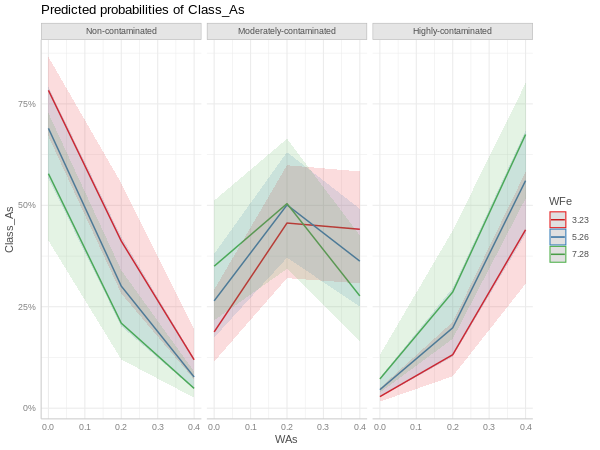

In [32]:
%%R -w 600 -h 450 -u px
predict_response(fit.ordinal, terms = c("WAs", "WFe")) |>
plot(facets = TRUE)

### Cross-validation

In [33]:
%%R
# Set the number of folds
K <- 5

# Create a vector to store misclassification rates for each fold
misclassification_rates <- numeric(K)

# Set seed for reproducibility
set.seed(123)

# Generate fold indices
folds <- sample(rep(1:K, length.out = nrow(df)))

# Loop through each fold
for (k in 1:K) {
  # Split the data into training and test sets
  train_data <- df[folds != k, ]
  test_data <- df[folds == k, ]

  # Fit the model on the training data
  model<-MASS::polr(Class_As~., data= df,
             Hess = TRUE)

  # Predict the class labels on the test set
    predicted_classes <- predict(model, newdata = test_data,  type = "class")

  # Calculate the misclassification rate for the current fold
  misclassified <- mean(predicted_classes == test_data$Class_As)
  fold_misclassification_rate <- misclassified / nrow(test_data)

  # Store the misclassification rate for this fold
  misclassification_rates[k] <- fold_misclassification_rate
}

# Calculate the average misclassification rate across all folds
avg_misclassification_rate <- mean(misclassification_rates)

# Display results
cat("Cross-Validated Misclassification Rates for Each Fold:", misclassification_rates, "\n")
cat("Average Cross-Validated Misclassification Rate:", avg_misclassification_rate, "\n")

Cross-Validated Misclassification Rates for Each Fold: 0.01281595 0.01174795 0.01317195 0.01368343 0.008505917 
Average Cross-Validated Misclassification Rate: 0.01198504 


### Prediction and Model Evaluation


#### Predicted Classes

In [34]:
%%R
predictedClass <- predict(fit.ordinal, test)
head(predictedClass)

[1] Moderately-contaminated Non-contaminated        Non-contaminated       
[4] Non-contaminated        Non-contaminated        Non-contaminated       
Levels: Non-contaminated Moderately-contaminated Highly-contaminated


#### Predicted Probabilites

In [35]:
%%R
predictedScores <- predict(fit.ordinal, test, type="p")
head(predictedScores)

  Non-contaminated Moderately-contaminated Highly-contaminated
1        0.3471316               0.4861844          0.16668400
2        0.8299989               0.1486820          0.02131907
3        0.8603704               0.1226623          0.01696730
4        0.8300323               0.1486535          0.02131412
5        0.8088840               0.1666036          0.02451237
6        0.8108544               0.1649373          0.02420824


#### Confusion Matrix

In [36]:
%%R
table(test$Class_As, predictedClass)

                         predictedClass
                          Non-contaminated Moderately-contaminated
  Non-contaminated                      21                       5
  Moderately-contaminated                8                      10
  Highly-contaminated                    2                       4
                         predictedClass
                          Highly-contaminated
  Non-contaminated                          2
  Moderately-contaminated                   9
  Highly-contaminated                      20


#### Misclassifiaction Error

In [ ]:
%%R
mean(as.character(test$Class_As) != as.character(predictedClass))

[1] 0.3703704


## Summary and Conclusion

Understanding ordinal regression and how to implement it in R can provide valuable insights into the relationships between predictor variables and ordinal response variables. This can lead to a deeper understanding of the factors influencing the outcome of interest. It's important to approach ordinal regression carefully, taking into consideration the specific data and research question.

## References

1. [Ordinal logistic regression](https://www.bookdown.org/rwnahhas/RMPH/blr-ordinal.html)

2. [ORDINAL LOGISTIC REGRESSION | R DATA ANALYSIS EXAMPLES](https://stats.oarc.ucla.edu/r/dae/ordinal-logistic-regression/)

3. [How to Perform Ordinal Logistic Regression in R](https://www.r-bloggers.com/2019/06/how-to-perform-ordinal-logistic-regression-in-r/)

4. [Chapter 12 Ordinal Logistic Regression](https://bookdown.org/chua/ber642_advanced_regression/ordinal-logistic-regression.html)

5. [Handbook of Regression Modeling in People Analytics:](https://peopleanalytics-regression-book.org/)